# Coresests

## Intro
The notion of **coresets** originates from computational geometry and refers to data summarization with strong theoretical guarantees. Coresets are gaining attention in the machine learning community: they allow to run expensive algorithms on a small subset of the data with error guarantees - this feature makes them the preferred choice over randomly created subsamples of the data. 

The classical definition of coresets is through the multiplicative error guarantee. Consider the data set $\mathbf{X}=\{x_1,...,x_n\}$ and a query space $\mathcal{Q}$ and a cost function (we will clarify these notions soon), we call s weighted subset of the data $\mathbf{C}=\{(c_1,w_1)...,(c_m, w_m)\}$, where $c_i$ are points from the data set and $w_i$ are their weights, a coreset, if:
$$ \left| \sum_{i=1}^n \textrm{cost}(x_i, Q) -   \sum_{i=1}^n w_i \textrm{cost}(c_i, Q)\right| \leq \varepsilon  \sum_{i=1}^n \textrm{cost}(x_i, Q),\quad \forall Q \in \mathcal{Q},$$
that is, the cost evaluated on the coreset if $\varepsilon$-multiplicatively close the full cost for all queries. This implies that we can solve the problem on the coreset without incurring too much error.

What are the queries and what is the cost function? We could think of the queries as the parameters of the model - in case of k-Means they are the chosen centers, in case of a neural net they are the weights. The cost function on the other hand is the objective of the optimization - for example, squared euclidean distance to the closest center in k-Means or the negative log-likelihood in case of probabilistic models. 

Coresets are inherently problem specific. In this tutorial, we will see how to create and use coresets for some basic models relying of the coreset library and observe their advantages. For a lenghtier intro to coresets, please refer to:

>Bachem, O., Lucic, M., & Krause, A. (2017). 
>Practical coreset constructions for machine learning. 
>arXiv preprint arXiv:1703.06476.

## Coreset Library

The coreset library implements coreset generation for
* k-Means
* Bayesian Gaussian mixture models (BGMM)
* Dirichlet process Gaussian mixture models (DPGMM)

and also provides the adapted version of these algorithms to support weighted data. This tutorial showcases the usage of the library and illustrates the principal techniques of working with coresets.

### References
The implementation of the library is based on the following works:
>Bachem, O., Lucic, M., & Krause, A. (2017). Practical coreset constructions for machine learning. arXiv preprint arXiv:1703.06476.

>Lucic, M., Faulkner, M., Krause, A., & Feldman, D. (2018). Training Gaussian Mixture Models at Scale via Coresets. Journal of Machine Learning Research, 18, Art-No.

> Borsos, Z., Bachem, O., & Krause, A. Variational Inference for DPGMM with Coresets. (2017). Advances in Approximate Bayesian Inference

## Tutorial

First, let us generate some data for clustering. We will do this with the [Chinese restaurant process](https://en.wikipedia.org/wiki/Chinese_restaurant_process).

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
np.random.seed(0)
from utils import datagen, plotting
import coresets
import algorithms

In [2]:
n = 1000
X, true_k, assignment = datagen.crp(n=n, alpha=5)

We plot the generated dataset together with the cluster assignments.

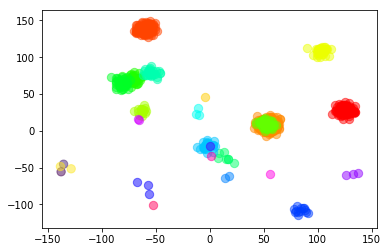

In [3]:
plotting.plot_2d_points_with_assignment(X, assignment)

If we cluster the data with $k=5$ centers, we get the following result:

Total k-Means cost: 84019.6922707


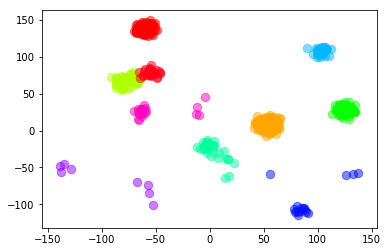

In [4]:
k = 10
km = algorithms.WeightedKMeans(n_clusters=k, n_iter=10)
km.fit(X)
y, dists = km.predict(X)
plotting.plot_2d_points_with_assignment(X, y)
print("Total k-Means cost: {}".format(np.sum(dists)))

Suppose we can only afford to run k-Means on 1% of the original data. The first idea is to randomly subsample the data and fit k-Means on it.

In [5]:
coreset_size = int(n * 0.01)
uniform_coreset_gen = coresets.KMeansUniformCoreset(X)
C, w = uniform_coreset_gen.generate_coreset(coreset_size)
plotting.plot_2d_points_and_coreset(X, C, w)

AttributeError: 'module' object has no attribute 'KMeansUniformCoreset'

The red stars indicate selected coreset points. Since we are only selecting 

In [ ]:
km_coreset = coresets.KMeansCoreset(X)
C, w = uniform_coreset_gen.generate_coreset(coreset_size)
plotting.plot_2d_points_and_coreset(X, C, w)